In [2]:
import kmedoids
import time
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.datasets import fetch_openml, make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
# !pip install kmedoids

In [4]:
# time and loss value comparison between FasterPAM and PAM

# kmedoids library:
# https://github.com/kno10/python-kmedoids

# PAM algorithm description:
# https://pl.wikipedia.org/wiki/Algorytm_PAM
# https://en.wikipedia.org/wiki/K-medoids#Partitioning_Around_Medoids_(PAM)

# upload mnist cipher data
X, _ = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
# taking only 1000 first pictures from mnist, just for a quick comparison
X = X[:1000]
# number of clusters
k = 100
diss = euclidean_distances(X)
start = time.time()
# applying faster PAM
fp = kmedoids.fasterpam(diss, k)
print("FasterPAM took: %.2f ms" % ((time.time() - start)*1000))
print("Loss with FasterPAM:", fp.loss)
start = time.time()
# applying ordinary PAM
pam = kmedoids.pam(diss, k)
print("PAM took: %.2f ms" % ((time.time() - start)*1000))
print("Loss with PAM:", pam.loss)

FasterPAM took: 77.01 ms
Loss with FasterPAM: 1326502.4085186739
PAM took: 4514.63 ms
Loss with PAM: 1326247.052783074


In [5]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate dataset with 4 clusters of different sizes
# We'll create clusters with 100, 50, 500, and 150 points respectively
cluster_sizes = [100, 50, 500, 150]
n_samples = sum(cluster_sizes)

# Cluster centers - positioned in a way that they're clearly separated
centers = [(2, 2), (4.75, 3), (3.5, 4.5), (1, 4.5)]

# Generate the dataset with different standard deviations for each cluster
# to make them visually distinct
X, y_true = make_blobs(n_samples=cluster_sizes,
                       centers=centers,
                       cluster_std=[0.5, 0.8, 0.3, 0.6],
                       random_state=42)

In [6]:
# Perform K-Medoids clustering
k=4
diss = euclidean_distances(X)
fp = kmedoids.fasterpam(diss, k)

In [7]:
# Perform K-Means clustering
# We know we have 4 clusters, so k=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X)

C:\Users\sylwester\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\sylwester\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
C:\Users\sylwester\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


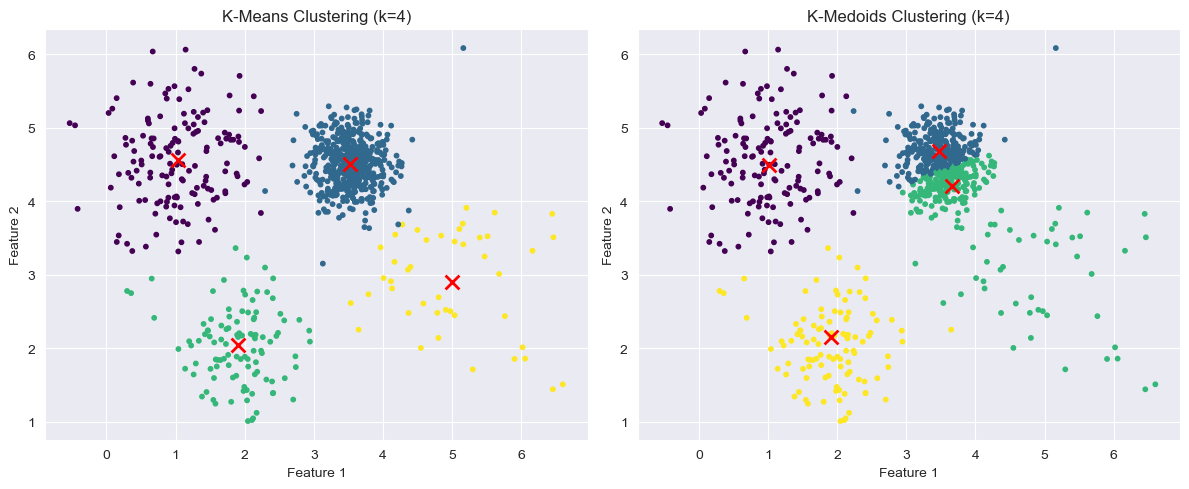

In [8]:
# Plot the K-Means clusters
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=10)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='x', s=100, linewidth=2)
plt.title("K-Means Clustering (k=4)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot the K-Medoids clusters
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=fp.labels, cmap='viridis', s=10)
plt.scatter(X[fp.medoids, 0], X[fp.medoids, 1],
            c='red', marker='x', s=100, linewidth=2)
plt.title("K-Medoids Clustering (k=4)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.savefig('kmedoids_kmeans_comparison.png')
plt.show()